# Samantha Bracellari

## CSI 5810 Assignment 4

### Problem 1 - SSE Clustering

In [95]:
# import libs
import numpy as np

# define vars
X1 = np.array([4, 5])
X2 = np.array([1, 4])
X3 = np.array([0, 1])
X4 = np.array([5, 0])

# define cluster centroids
A1, A2 = np.array([2.5, 4.5]), np.array([2.5, 0.5]) # first partition
B1, B2 = np.array([4.5, 2.5]), np.array([0.5, 2.5]) # second partition
C1, C2 = np.array([1.67, 3.33]), np.array([5, 0]) # third partition

# define our distance function
def dist(predicted, expected):
    return np.square(predicted-expected).sum()

# calculate sum of squared errors for each partition
SSE1 = dist(X1, A1) + dist(X2, A1) + dist(X3, A2) + dist(X4, A2)
SSE2 = dist(X1, B1) + dist(X2, B2) + dist(X3, B2) + dist(X4, B1)
SSE3 = dist(X1, C1) + dist(X2, C1) + dist(X3, C1) + dist(X4, C2)

print('SSE1:', SSE1, '\nSSE2:', SSE2, '\nSSE3:', SSE3)

SSE1: 18.0 
SSE2: 18.0 
SSE3: 17.3334


-----

### Problem 2 - Complete Link Clustering

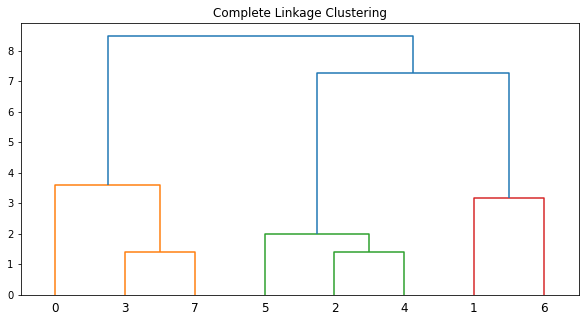

<Figure size 432x288 with 0 Axes>

In [106]:
# import libs
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# define the data
A = np.array([2, 10])
B = np.array([2, 5])
C = np.array([8, 4])
D = np.array([5, 8])
E = np.array([7, 5])
F = np.array([6, 4])
G = np.array([1, 2])
H = np.array([4, 9])
X = np.array([A, B, C, D, E, F, G, H])

# perform complete linkage clustering & plot dendrogram
L = linkage(X, 'complete')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(L)
plt.title('Complete Linkage Clustering')
plt.show()

-----

### Problem 3 - K-Means Clustering

In [83]:
# import libs
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# define some variables and read in the wine data
data = pd.read_csv('wine.csv')
kvals = [2, 3, 4, 5]
SSE = [] # for sum of squred error
ARI = [] # for adjusted rand index

# perform kmeans for each k value, as well as calculate the SSE and ARI
for k in kvals:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)
    ARI.append(adjusted_rand_score(kmeans.labels_, data['x1']))

# tabluate data
result_data = np.array([[2, 3, 4, 5], SSE, ARI])
results = pd.DataFrame(result_data.T, columns=['k Value', 'SSE', 'ARI'])
print(results.to_markdown())

|    |   k Value |              SSE |      ARI |
|---:|----------:|-----------------:|---------:|
|  0 |         2 |      4.5438e+06  | 0.369408 |
|  1 |         3 |      2.37074e+06 | 0.371114 |
|  2 |         4 |      1.33195e+06 | 0.303443 |
|  3 |         5 | 916424           | 0.311588 |


-----

### Problem 4 - Linear Predictive Model

In [1]:
# import libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('crime-rate.csv')
X = data.iloc[:, 1:7].to_numpy()
y = np.array(data['X1'])
L = [0.000001, 0.0000025, 0.000005] # learning rates
beta = np.ones(6)
x = np.dot(X, beta) # expected values

def gd(X, y, beta, L, m=50, epochs=100000):
    cost = []
    for i in range(0, epochs):
        H = np.dot(X, beta) # hypothesis value
        loss = H - y # compute loss
        MSE = np.sum(loss ** 2) / (2 * m) # use loss to compute MSE
        cost.append(MSE)
        g = np.dot(X.T, loss) / m # gradient
        beta = beta - L*g # update beta
    return beta, cost

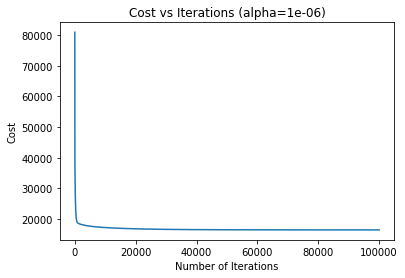

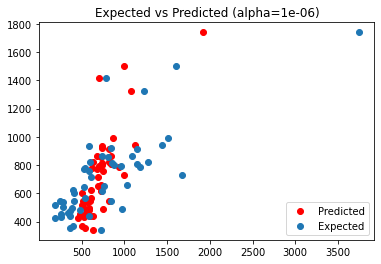

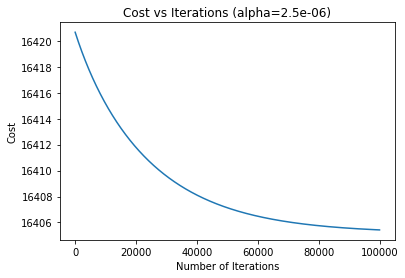

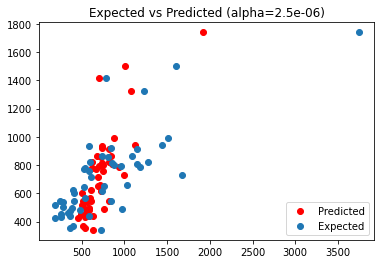

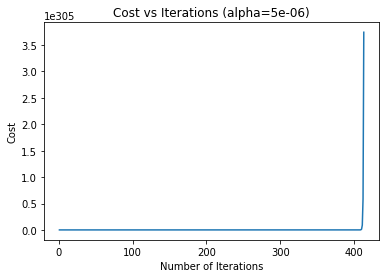

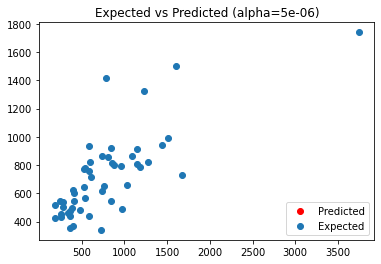

In [2]:
for alpha in L:
    beta, cost = gd(X, y, beta, alpha) # get beta values and cost
    n = [x for x in range(1, 100001)]

    # plot the cost per iteration to see if the algorithm worked well
    plt.plot(n, cost)
    plt.title('Cost vs Iterations (alpha=' + str(alpha) + ')')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.show()

    print('\n')

    yhat = np.dot(X, beta) # get predicted values

    # plot expected vs predicted 
    plt.scatter(yhat, y, color='red', label='Predicted') # predicted
    plt.scatter(x, y, label='Expected') # expected
    plt.legend(loc='lower right')
    plt.title('Expected vs Predicted (alpha=' + str(alpha) + ')')
    plt.show()

    print('\n')

-----

### Problem 5 - Pseudo-Inverse Matrix

In [3]:
# import libs
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.metrics import r2_score

# define the corn data
corn = np.array([
    [40, 6, 4],
    [44, 10, 4],
    [46, 12, 5],
    [46, 12, 5],
    [48, 14, 7],
    [52, 16, 9],
    [58, 18, 12],
    [60, 22, 14],
    [68, 24, 20],
    [74, 26, 21],
    [80, 32, 24]
])
data = pd.DataFrame(corn, columns=['Corn', 'Fertilizer', 'Insecticides'])

In [4]:
# define X and its transpose
X = np.array([[1]*11, data['Fertilizer'], data['Insecticides']]).T
Xt = X.T

# define the product of X transpose and X, as well as its inverse
XtX = np.matmul(Xt, X)
XtXi = inv(XtX)

Xstar = np.matmul(XtXi, Xt) # define X*

Y = np.array(data['Corn']) # expected values

a = np.matmul(Xstar, Y)

# predicted values 
Yhat = np.array(a[0] + a[1]*data['Fertilizer'] + a[2]*data['Insecticides'])
print(Yhat)

[40.35276398 43.04070667 45.46430025 45.46430025 48.96751608 52.47073191
 57.05356997 61.90075714 69.72246194 72.14605552 79.41683628]


In [5]:
# calculate the r-squared coefficient
r2 = r2_score(np.array(data['Corn']), Yhat)
print('\n', r2)


 0.9919558582870186


-----

### Problem 6 - Logistic Regression

In [8]:
# import libs
import numpy as np
import pandas as pd
from random import random, uniform
from math import sqrt, sin, cos, pi
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

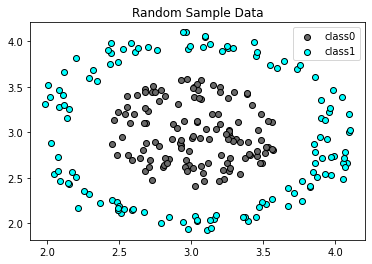

In [18]:
# generate 2 class data in a circular formation
A = []
B = []

for i in range(125):
    theta = random()*2*pi
    ra, rb = 0.6*sqrt(random()), 2*sqrt(random())
    A.append([3+ra*cos(theta), 3+ra*sin(theta)])
    B.append([uniform(2.85, 3.15)+cos(theta), uniform(2.9, 3.1)+sin(theta)])

# plot features of the generated data
A, B = np.array(A), np.array(B)
plt.scatter(A[:, 0], A[:, 1], label='class0', color='dimgrey', edgecolors='black')
plt.scatter(B[:, 0], B[:, 1], label='class1', color='aqua', edgecolors='black')
plt.title('Random Sample Data')
plt.legend()
plt.show()

In [19]:
# augment 3 more features to each sample, as well as a class feature (0 or 1)
data = []
for i in range(0, 125):
    afeatures = [A[i][0], A[i][1], A[i][0]*A[i][1], A[i][0]*A[i][0], A[i][1]*A[i][1], 0]
    bfeatures = [B[i][0], B[i][1], B[i][0]*B[i][1], B[i][0]*B[i][0], B[i][1]*B[i][1], 1]

    data.append(afeatures)
    data.append(bfeatures)

In [20]:
# define our features and our target, and split them into train and test groups (80% train, 20% test)
data = np.array(data)
X = data[:, 0:2]
y = data[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# this is just to change the colors of the plotted points for later
colors = []
for y in y_test:
    if y == 0:
        colors.append('dimgrey')
    else: 
        colors.append('aqua')

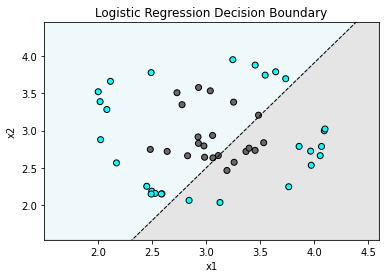

In [21]:
# train the logistic model with the training set
LR = LogisticRegression().fit(X_train, y_train)

# use the model parameters and the test data to plot the decision boundary
b = LR.intercept_[0] # find model intercept
w = LR.coef_.T # find model weights

c = -b/w[1]
m = -w[0]/w[1]

x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
x2_min, x2_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xd = np.array([x1_min, x1_max])
yd = m*xd + c

# plot data as well as decision boundary
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, x2_min, color='gray', alpha=0.2)
plt.fill_between(xd, yd, x2_max, color='powderblue', alpha=0.2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, edgecolors='black')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('Logistic Regression Decision Boundary')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()